# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet(r'D:\Data Science\Dataset\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files

import os

# Path to your folder with Parquet files
os.chdir(r'D:\Data Science\Dataset\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# List all monthly parquet files
file_list = sorted([f for f in os.listdir() if f.endswith('.parquet')])

# Final dataframe to hold all sampled data
df = pd.DataFrame()

# Process each file
for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)

        # Load file
        monthly_data = pd.read_parquet(file_path)

        # Ensure datetime format
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # Extract date and hour
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # Sampled data from this file
        sampled_data = pd.DataFrame()

        # Loop through each date
        for date in monthly_data['date'].unique():
            daily_data = monthly_data[monthly_data['date'] == date]

            # Loop through each hour
            for hour in range(24):
                hour_data = daily_data[daily_data['hour'] == hour]

                if len(hour_data) > 0:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Append to final dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(f"Processed {file_name} | Sampled rows: {len(sampled_data)}")

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

Processed 2023-1.parquet | Sampled rows: 152087
Processed 2023-10.parquet | Sampled rows: 174255
Processed 2023-11.parquet | Sampled rows: 165133
Processed 2023-12.parquet | Sampled rows: 166709
Processed 2023-2.parquet | Sampled rows: 168696
Processed 2023-3.parquet | Sampled rows: 163786
Processed 2023-4.parquet | Sampled rows: 139641
Processed 2023-5.parquet | Sampled rows: 144458
Processed 2023-6.parquet | Sampled rows: 162910
Processed 2023-7.parquet | Sampled rows: 174068
Processed 2023-8.parquet | Sampled rows: 143782
Processed 2023-9.parquet | Sampled rows: 140875
Processed nyc_sampled_data.parquet | Sampled rows: 85
Processed sampled_trip_data.parquet | Sampled rows: 14735


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
# The sampling fraction provided still gave a large dataset. Adjusting it to 300,000 records and saved as parquet

In [11]:
# Downsampling if > 300,000 rows
if len(df) > 300000:
    df = df.sample(n=300000, random_state=42).reset_index(drop=True)
    print("Downsampled final dataset to 300,000 rows")

# Save as Parquet
output_folder = r'D:\Data Science\Dataset\Processed_NYC_Taxi'
os.makedirs(output_folder, exist_ok=True)

df.to_parquet(os.path.join(output_folder, 'nyc_sampled_data.parquet'), index=False)

print(f"\n Final sampled data saved to: {output_folder}")
print(df.info())


 Final sampled data saved to: D:\Data Science\Dataset\Processed_NYC_Taxi
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289745 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289745 non-null  float64       
 6   store_and_fwd_flag     289745 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 

In [12]:
# Store the df in csv/parquet
df.to_parquet('nyc_sampled_data.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file

df = pd.read_parquet('nyc_sampled_data.parquet')

In [14]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-05-25 19:13:20   2023-05-25 19:18:15              1.0   
1         1  2023-12-05 22:25:03   2023-12-05 22:54:25              1.0   
2         2  2023-03-07 17:20:00   2023-03-07 17:25:37              1.0   
3         2  2023-09-03 10:22:45   2023-09-03 10:35:51              1.0   
4         1  2023-09-26 13:16:49   2023-09-26 13:24:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.28         1.0                  N           230           230   
1          12.30         1.0                  N           138           161   
2           1.02         1.0                  N           140           237   
3           3.08         1.0                  N           230           211   
4           0.70         1.0                  N           151           238   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00          0.00   
1             1  ...      0.5       13.85          6.94   
2             1  ...      0.5        2.30          0.00   
3             2  ...      0.5        0.00          0.00   
4             1  ...      0.5        2.20          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         11.60                   2.5          NaN   
1                    1.0         83.14                   2.5          NaN   
2                    1.0         16.00                   2.5          NaN   
3                    1.0         19.60                   2.5          NaN   
4                    1.0         13.40                   2.5          NaN   

         date  hour Airport_fee  
0  2023-05-25    19        0.00  
1  2023-12-05    22        1.75  
2  2023-03-07    17        0.00  
3  2023-09-03    10        0.00  
4  2023-09-26    13        0.00  

[5 rows x 22 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289745 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289745 non-null  float64       
 6   store_and_fwd_flag     289745 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combine the two airport fee columns

df['fee_airport'] = df[['airport_fee' , 'Airport_fee']].sum(axis=1, min_count=1)
df1= df.drop(columns= ['airport_fee', 'Airport_fee'], axis=1)
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-05-25 19:13:20   2023-05-25 19:18:15              1.0   
1         1  2023-12-05 22:25:03   2023-12-05 22:54:25              1.0   
2         2  2023-03-07 17:20:00   2023-03-07 17:25:37              1.0   
3         2  2023-09-03 10:22:45   2023-09-03 10:35:51              1.0   
4         1  2023-09-26 13:16:49   2023-09-26 13:24:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.28         1.0                  N           230           230   
1          12.30         1.0                  N           138           161   
2           1.02         1.0                  N           140           237   
3           3.08         1.0                  N           230           211   
4           0.70         1.0                  N           151           238   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...   2.50      0.5        0.00          0.00   
1             1  ...  10.25      0.5       13.85          6.94   
2             1  ...   2.50      0.5        2.30          0.00   
3             2  ...   0.00      0.5        0.00          0.00   
4             1  ...   2.50      0.5        2.20          0.00   

   improvement_surcharge  total_amount  congestion_surcharge        date hour  \
0                    1.0         11.60                   2.5  2023-05-25   19   
1                    1.0         83.14                   2.5  2023-12-05   22   
2                    1.0         16.00                   2.5  2023-03-07   17   
3                    1.0         19.60                   2.5  2023-09-03   10   
4                    1.0         13.40                   2.5  2023-09-26   13   

   fee_airport  
0         0.00  
1         1.75  
2         0.00  
3         0.00  
4         0.00  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [27]:
# check where values of fare amount are negative

negative_fares = df1.fare_amount[df.fare_amount < 0]
print(f"Number of rows with negative fare amounts: {len(negative_fares)}")

Number of rows with negative fare amounts: 0


Did you notice something different in the `RatecodeID` column for above records?

In [34]:
# Analyse RatecodeID for the negative fare amounts

negative_fares = df1[df1['fare_amount'] < 0]
ratecode_counts = negative_fares_df['RatecodeID'].value_counts(dropna=False)
print(f'RatecodeID for negative fare amounts: {len(ratecode_counts)}')

RatecodeID for negative fare amounts: 0


In [38]:
# Find which columns have negative values

df1.select_dtypes(include=["number"]).lt(0).sum()

VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     0
mta_tax                  12
tip_amount                0
tolls_amount              0
improvement_surcharge    13
total_amount             13
congestion_surcharge     10
hour                      0
fee_airport               2
dtype: int64

In [41]:
# fix these negative values

columns_to_fix = ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'fee_airport']
df1[columns_to_fix] = df1[columns_to_fix].abs()
print(df1.select_dtypes(include=["number"]).lt(0).sum())

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
hour                     0
fee_airport              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [44]:
# Find the proportion of missing values in each column

temp=pd.DataFrame(100*df1.isnull().mean(),columns=["% Missing Values"]) 
temp.sort_values(by="% Missing Values", ascending=False)

% Missing Values
fee_airport                    3.418333
passenger_count                3.418333
RatecodeID                     3.418333
store_and_fwd_flag             3.418333
congestion_surcharge           3.418333
mta_tax                        0.000000
hour                           0.000000
date                           0.000000
total_amount                   0.000000
improvement_surcharge          0.000000
tolls_amount                   0.000000
tip_amount                     0.000000
VendorID                       0.000000
extra                          0.000000
tpep_pickup_datetime           0.000000
payment_type                   0.000000
DOLocationID                   0.000000
PULocationID                   0.000000
trip_distance                  0.000000
tpep_dropoff_datetime          0.000000
fare_amount                    0.000000

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [45]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df1[df1['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
29             2  2023-10-25 09:25:52   2023-10-25 09:39:09              NaN   
97             2  2023-05-24 08:46:42   2023-05-24 09:25:23              NaN   
100            2  2023-11-04 23:35:09   2023-11-05 00:17:21              NaN   
110            2  2023-10-20 16:57:17   2023-10-20 18:17:23              NaN   
121            2  2023-12-11 15:28:43   2023-12-11 16:08:36              NaN   
...          ...                  ...                   ...              ...   
299892         2  2023-02-07 21:19:00   2023-02-07 21:28:00              NaN   
299903         2  2023-12-13 09:04:01   2023-12-13 09:22:14              NaN   
299959         2  2023-11-07 20:25:18   2023-11-07 20:32:08              NaN   
299977         2  2023-03-20 09:15:10   2023-03-20 09:23:29              NaN   
299990         2  2023-11-20 17:07:14   2023-11-20 17:32:09              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
29               2.47         NaN               None           137   
97               3.60         NaN               None           236   
100              2.92         NaN               None           114   
110              6.20         NaN               None           256   
121              7.93         NaN               None           238   
...               ...         ...                ...           ...   
299892           2.08         NaN               None           233   
299903           3.35         NaN               None           142   
299959           1.07         NaN               None           239   
299977           1.90         NaN               None            79   
299990           3.07         NaN               None           246   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
29               249             0  ...    0.0      0.5        4.12   
97                68             0  ...    0.0      0.5        6.43   
100               50             0  ...    0.0      0.5        2.00   
110               48             0  ...    0.0      0.5        3.00   
121              148             0  ...    0.0      0.5        0.00   
...              ...           ...  ...    ...      ...         ...   
299892            79             0  ...    0.0      0.5        3.00   
299903            75             0  ...    0.0      0.5        0.00   
299959           163             0  ...    0.0      0.5        1.59   
299977           249             0  ...    0.0      0.5        1.82   
299990           144             0  ...    0.0      0.5        1.00   

        tolls_amount  improvement_surcharge  total_amount  \
29               0.0                    1.0         24.71   
97               0.0                    1.0         38.58   
100              0.0                    1.0         33.12   
110              0.0                    1.0         52.02   
121              0.0                    1.0          9.38   
...              ...                    ...           ...   
299892           0.0                    1.0         18.00   
299903           0.0                    1.0         31.62   
299959           0.0                    1.0         17.47   
299977           0.0                    1.0         19.99   
299990           0.0                    1.0         23.72   

        congestion_surcharge        date hour  fee_airport  
29                       NaN  2023-10-25    9          NaN  
97                       NaN  2023-05-24    8          NaN  
100                      NaN  2023-11-04   23          NaN  
110                      NaN  2023-10-20   16          NaN  
121                      NaN  2023-12-11   15          NaN  
...                      ...         ...  ...          ...  
299892                   NaN  2023-02-07   21          NaN  
299903                   NaN  2023-12-13    9          NaN  
299959                   NaN  2023-11-07   20          NaN  
299977    

In [46]:
df1.passenger_count.describe()

count    289745.000000
mean          1.369204
std           0.894184
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64

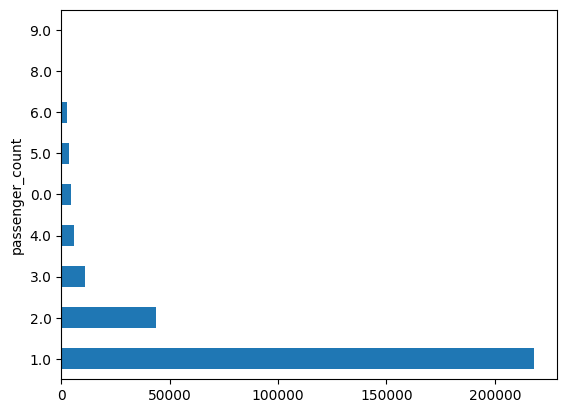

In [48]:
df1.passenger_count.value_counts().plot.barh()
plt.show()

Did you find zeroes in passenger_count? Handle these.

In [51]:
df1.passenger_count = df1.passenger_count.fillna(1) #Imputed the NaN values with the mode
df1.passenger_count = df1.passenger_count.replace(0,1)
print("Number of 0s after cleaning:", (df1['passenger_count'] == 0).sum())

Number of 0s after cleaning: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [53]:
# Fix missing values in 'RatecodeID'

df1.RatecodeID.value_counts(normalize = True)

RatecodeID
1.0     0.944089
2.0     0.039259
99.0    0.005795
5.0     0.005536
3.0     0.003324
4.0     0.001995
6.0     0.000003
Name: proportion, dtype: float64

In [55]:
# Fill NaNs with standard rate and convert to int
df1['RatecodeID'] = df1['RatecodeID'].fillna(1).astype(int)
print("Remaining missing RatecodeID:", df1['RatecodeID'].isnull().sum())

Remaining missing RatecodeID: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [57]:
# handle null values in congestion_surcharge

df1.congestion_surcharge.value_counts(normalize=True)

congestion_surcharge
2.5    0.923084
0.0    0.076916
Name: proportion, dtype: float64

In [58]:
df1.congestion_surcharge = df1.congestion_surcharge.fillna(2.5)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [62]:
df1.fee_airport = df1.fee_airport.fillna(df1.fee_airport.median())
df1.store_and_fwd_flag = df1.store_and_fwd_flag.fillna('N')
print(df1.isnull().sum().loc[lambda x: x > 0])

Series([], dtype: int64)


In [63]:
# Handle any remaining missing values

df1.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
fee_airport              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [64]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df1.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.732840  2023-07-02 22:08:57.090583  2023-07-02 22:26:19.451183   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:10:20   
25%         1.000000  2023-04-02 21:53:46.500000         2023-04-02 22:19:37   
50%         2.000000  2023-06-27 14:02:13.500000         2023-06-27 14:28:23   
75%         2.000000  2023-10-06 19:54:01.500000  2023-10-06 20:11:22.250000   
max         6.000000         2023-12-31 23:53:18         2024-01-01 00:29:11   
std         0.447869                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.372227       3.793493       1.619993     165.193117   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22910.920000      99.000000     265.000000   
std           0.865846      72.893174       7.315730      64.052411   

        DOLocationID   payment_type    fare_amount          extra  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      164.061587       1.164540      19.832430       1.587317   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     999.000000      12.500000   
std        69.747421       0.508777      18.338603       1.826967   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  300000.000000  300000.000000  300000.000000          300000.000000   
mean        0.495351       3.539386       0.594449               0.998998   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.830000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     200.000000      95.000000               1.000000   
std         0.048093       4.092550       2.172087               0.029277   

        total_amount  congestion_surcharge           hour    fee_airport  
count  300000.000000         300000.000000  300000.000000  300000.000000  
mean       28.882508              2.314283      14.272520       0.136917  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.860000              2.500000      19.000000       0.000000  
max      1000.000000              2.500000      23.000000       1.750000  
std        22.881691              0.655593       5.804842       0.455880

In [65]:
df1['trip_duration_minutes'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60
print(df1['trip_duration_minutes'].describe())

count    300000.000000
mean         17.372677
std          39.410032
min         -54.300000
25%           7.650000
50%          12.633333
75%          20.716667
max        1439.266667
Name: trip_duration_minutes, dtype: float64


In [66]:
df1 = df1[df1['trip_duration_minutes'] >= 0]

In [69]:
df1[(df1['trip_distance'] < 0.1) & (df1['fare_amount'] > 300)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14548          2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
106900         1  2023-01-11 12:38:54   2023-01-11 12:38:54              1.0   
175388         2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
247921         2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
264195         1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
275451         2  2023-07-15 16:08:15   2023-07-15 16:08:35              2.0   
292953         1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
297033         2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
299914         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
14548             0.0           5                  N            39   
106900            0.0          99                  N           264   
175388            0.0           5                  N           265   
247921            0.0           5                  N           265   
264195            0.0           5                  N           141   
275451            0.0           5                  N           265   
292953            0.0           5                  N            94   
297033            0.0           5                  N           265   
299914            0.0           5                  N           265   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
14548             39             3  ...      0.0        0.00           0.0   
106900           264             1  ...      0.0        0.00           0.0   
175388           265             3  ...      0.0        0.00           0.0   
247921           265             1  ...      0.0       61.23           0.0   
264195           141             3  ...      0.0        0.00           0.0   
275451           265             1  ...      0.0       70.00          24.0   
292953            94             1  ...      0.0        0.00           0.0   
297033           265             1  ...      0.0        0.00           0.0   
299914           265             2  ...      0.0        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
14548                     1.0        501.00                   0.0  2023-08-01   
106900                    0.0        450.00                   0.0  2023-01-11   
175388                    1.0        501.00                   0.0  2023-08-13   
247921                    1.0        367.37                   0.0  2023-11-26   
264195                    1.0       1000.00                   0.0  2023-01-09   
275451                    1.0        420.00                   0.0  2023-07-15   
292953                    1.0        451.00                   0.0  2023-06-08   
297033                    1.0        319.00                   0.0  2023-05-19   
299914                    1.0        501.00                   0.0  2023-06-21   

        hour fee_airport  trip_duration_minutes  
14548     22         0.0               0.633333  
106900    12         0.0               0.000000  
175388    18         0.0               0.233333  
247921    16         0.0               0.100000  
264195    16         0.0               3.150000  
275451    16         0.0               0.333333  
292953     4         0.0               0.583333  
297033    21         0.0               0.266667  
299914    12         0.0               0.350000  

[9 rows x 22 columns]

In [70]:
df1[(df1["trip_distance"] == 0) & (df1["fare_amount"] == 0) & (df1["PULocationID"] != df1["DOLocationID"])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
13194          1  2023-11-07 08:42:41   2023-11-07 08:42:41              1.0   
20340          2  2023-04-24 12:48:38   2023-04-24 12:48:44              1.0   
32202          1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
54871          1  2023-01-18 15:42:00   2023-01-18 15:42:00              1.0   
55812          1  2023-02-03 14:44:55   2023-02-03 14:44:55              1.0   
83482          1  2023-10-21 02:43:51   2023-10-21 02:43:51              1.0   
157261         1  2023-01-18 16:23:49   2023-01-18 16:23:49              1.0   
172369         1  2023-11-08 15:29:15   2023-11-08 15:29:47              1.0   
178476         1  2023-11-17 10:27:39   2023-11-17 10:27:39              1.0   
202368         1  2023-07-27 18:59:15   2023-07-27 18:59:15              2.0   
273557         1  2023-06-14 09:40:39   2023-06-14 09:40:39              1.0   
284669         1  2023-10-03 09:03:22   2023-10-03 09:30:54              1.0   
294450         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
13194             0.0           1                  N           237   
20340             0.0           5                  N           140   
32202             0.0           5                  Y           138   
54871             0.0           1                  N           161   
55812             0.0           1                  Y           237   
83482             0.0           5                  Y           265   
157261            0.0           1                  N           239   
172369            0.0           1                  N           164   
178476            0.0           1                  N           261   
202368            0.0           5                  N           231   
273557            0.0           5                  Y           265   
284669            0.0           1                  N           262   
294450            0.0           2                  N           107   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
13194            264             2  ...      0.0         0.0           0.0   
20340              7             2  ...      0.0         0.0           0.0   
32202            264             2  ...      0.0         0.0           0.0   
54871            264             2  ...      0.0         0.0           0.0   
55812            264             4  ...      0.0         0.0           0.0   
83482            264             2  ...      0.0         0.0           0.0   
157261           264             2  ...      0.0         0.0           0.0   
172369           161             1  ...      0.0         0.0           0.0   
178476           264             2  ...      0.0         0.0           0.0   
202368           264             2  ...      0.0         0.0           0.0   
273557           264             2  ...      0.0         0.0           0.0   
284669           230             0  ...      0.0         0.0           0.0   
294450           137             2  ...      0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
13194                     0.0          0.00                   0.0  2023-11-07   
20340                     1.0          3.50                   2.5  2023-04-24   
32202                     1.0         10.25                   2.5  2023-12-20   
54871                     0.0          0.00                   0.0  2023-01-18   
55812                     0.0          0.00                   0.0  2023-02-03   
83482                     0.0          0.00                   0.0  2023-10-21   
157261                    0.0          0.00                   0.0  2023-01-18   
172369                    0.0          0.00                   0.0  2023-11-08   
178476                    0.0          0.00                   0.0  2023-11-17   
202

In [71]:
df1[df1.trip_distance > 250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5934           2  2023-09-10 13:44:00   2023-09-10 14:16:00              1.0   
16745          2  2023-06-26 13:45:44   2023-06-26 13:51:12              2.0   
26785          2  2023-10-30 07:13:00   2023-10-30 07:33:00              1.0   
39280          2  2023-05-11 19:43:07   2023-05-11 20:01:07              1.0   
42602          2  2023-01-07 20:02:05   2023-01-07 20:07:10              1.0   
55796          1  2023-09-17 07:23:50   2023-09-17 07:48:20              1.0   
116276         2  2023-11-20 11:46:00   2023-11-20 12:30:00              1.0   
124093         2  2023-03-03 19:47:00   2023-03-03 20:05:00              1.0   
159920         2  2023-05-12 15:12:50   2023-05-12 16:03:58              1.0   
274100         2  2023-02-17 22:36:00   2023-02-17 23:00:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
5934         22910.92           1                  N           163   
16745         6262.99           1                  N            75   
26785         4547.48           1                  N           143   
39280         9675.03           1                  N            68   
42602          721.26           1                  N           145   
55796        10452.60          99                  N           159   
116276       22869.37           1                  N           179   
124093        7094.16           1                  N            75   
159920        9678.78           1                  N           138   
274100       11551.95           1                  N            41   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
5934             223             0  ...      0.5        6.33          0.00   
16745            238             1  ...      0.5        1.88          0.00   
26785            136             0  ...      0.5        4.05          0.00   
39280            231             1  ...      0.5        7.89          0.00   
42602              7             1  ...      0.5        2.00          0.00   
55796            254             1  ...      0.5        0.00          0.00   
116276           237             0  ...      0.5        0.00          0.00   
124093            42             0  ...      0.5        0.00          0.00   
159920           116             2  ...      0.5        0.00          6.55   
274100           170             0  ...      0.5        5.61          0.00   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
5934                      1.0         37.99                   2.5  2023-09-10   
16745                     1.0         11.28                   0.0  2023-06-26   
26785                     1.0         44.52                   2.5  2023-10-30   
39280                     1.0         34.19                   2.5  2023-05-11   
42602                     1.0         11.40                   0.0  2023-01-07   
55796                     1.0         29.00                   0.0  2023-09-17   
116276                    1.0         31.39                   2.5  2023-11-20   
124093                    1.0         20.31                   2.5  2023-03-03   
159920                    1.0         55.15                   0.0  2023-05-12   
274100                    1.0         33.64                   2.5  2023-02-17   

        hour fee_airport  trip_duration_minutes  
5934      13         0.0              32.000000  
16745     13         0.0               5.466667  
26785      7         0.0              20.000000  
39280     19         0.0              18.000000  
42602     20         0.0               5.083333  
55796      7         0.0              24.500000  
116276    11         0.0              44.000000  
124093    19         0.0              18.000000  
159920    15         0.0              51.133333  
274100    22         0.0              24.000000  

[10 rows x 22 columns]

In [72]:
df1[df1.payment_type==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
29             2  2023-10-25 09:25:52   2023-10-25 09:39:09              1.0   
97             2  2023-05-24 08:46:42   2023-05-24 09:25:23              1.0   
100            2  2023-11-04 23:35:09   2023-11-05 00:17:21              1.0   
110            2  2023-10-20 16:57:17   2023-10-20 18:17:23              1.0   
121            2  2023-12-11 15:28:43   2023-12-11 16:08:36              1.0   
...          ...                  ...                   ...              ...   
299892         2  2023-02-07 21:19:00   2023-02-07 21:28:00              1.0   
299903         2  2023-12-13 09:04:01   2023-12-13 09:22:14              1.0   
299959         2  2023-11-07 20:25:18   2023-11-07 20:32:08              1.0   
299977         2  2023-03-20 09:15:10   2023-03-20 09:23:29              1.0   
299990         2  2023-11-20 17:07:14   2023-11-20 17:32:09              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
29               2.47           1                  N           137   
97               3.60           1                  N           236   
100              2.92           1                  N           114   
110              6.20           1                  N           256   
121              7.93           1                  N           238   
...               ...         ...                ...           ...   
299892           2.08           1                  N           233   
299903           3.35           1                  N           142   
299959           1.07           1                  N           239   
299977           1.90           1                  N            79   
299990           3.07           1                  N           246   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
29               249             0  ...      0.5        4.12           0.0   
97                68             0  ...      0.5        6.43           0.0   
100               50             0  ...      0.5        2.00           0.0   
110               48             0  ...      0.5        3.00           0.0   
121              148             0  ...      0.5        0.00           0.0   
...              ...           ...  ...      ...         ...           ...   
299892            79             0  ...      0.5        3.00           0.0   
299903            75             0  ...      0.5        0.00           0.0   
299959           163             0  ...      0.5        1.59           0.0   
299977           249             0  ...      0.5        1.82           0.0   
299990           144             0  ...      0.5        1.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
29                        1.0         24.71                   2.5  2023-10-25   
97                        1.0         38.58                   2.5  2023-05-24   
100                       1.0         33.12                   2.5  2023-11-04   
110                       1.0         52.02                   2.5  2023-10-20   
121                       1.0          9.38                   2.5  2023-12-11   
...                       ...           ...                   ...         ...   
299892                    1.0         18.00                   2.5  2023-02-07   
299903                    1.0         31.62                   2.5  2023-12-13   
299959                    1.0         17.47                   2.5  2023-11-07   
299977                    1.0         19.99                   2.5  2023-03-20   
299990                    1.0         23.72                   2.5  2023-11-20   

        hour fee_airport  trip_duration_minutes  
29         9         0.0              13.283333  
97         8         0.0              38.683333  
100       23         0.0              42.200000  
110       16         0.0              80.100000  
121       15         0.0              39.88333

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [74]:
# remove passenger_count > 6
df1 = df1.drop(df1[df1['passenger_count'] > 6].index)

In [77]:
# Continue with outlier handling
df1 = df1.drop(df1[(df1['trip_distance'] < 0.1) & (df1['fare_amount'] > 300)].index)
df1 = df1.drop(df1[(df1["trip_distance"] == 0) & (df1["fare_amount"] == 0) & (df1["PULocationID"] != df1["DOLocationID"])].index)
df1 = df1.drop(df1[df1.trip_distance > 250].index)
df1 = df1.drop(df1[df1.fare_amount > 500].index)
print(df1.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
fee_airport              0
trip_duration_minutes    0
dtype: int64


In [78]:
df1.shape

(299944, 22)

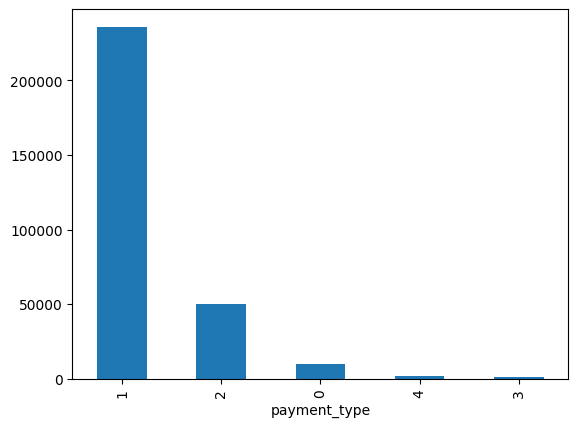

In [80]:
# Do any columns need standardising?

df1.payment_type.value_counts().plot.bar()
plt.savefig('payment_type.png')
plt.show()

In [81]:
df1.payment_type.replace(0, 1, inplace=True)

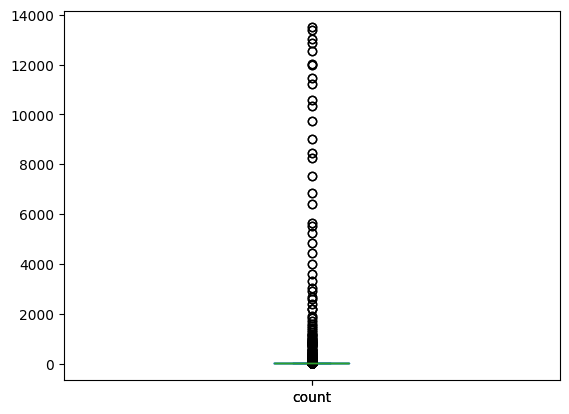

In [83]:
df1.fare_amount.value_counts().plot.box()
plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [85]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'fee_airport',
 'trip_duration_minutes']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical 
* `trip_distance`: Numerical 
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical 
* `trip_duration`: Numerical 


The following monetary parameters belong in the same category, is it categorical or numerical?

### **Numerical**
* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [88]:
# Find and show the hourly trends in taxi pickups

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

# Group by hour and count pickups
hourly_trends = df1.groupby("hour").size()

plt.figure(figsize=(10,4))
sns.lineplot(data=hourly_trends, marker="o", linestyle='-', color='b')
plt.title("Hourly Trends In Taxi Pickups")
plt.grid(True)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('Hourly_Trends_In_Taxi_Pickups.png')
plt.show()

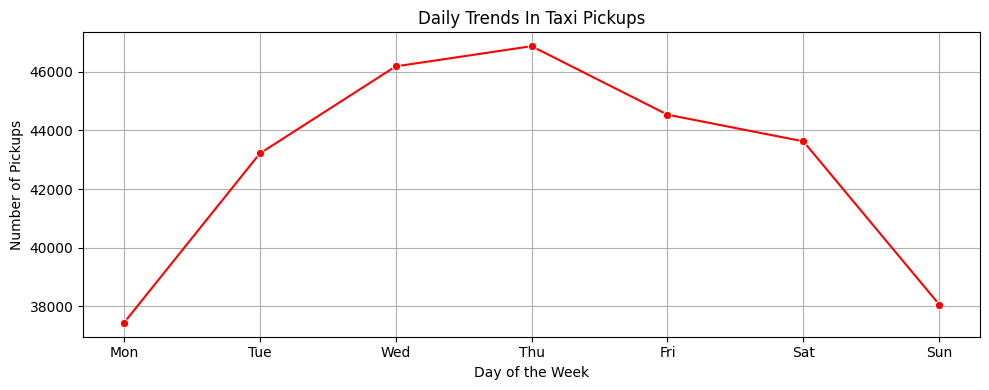

In [90]:
# Find and show the daily trends in taxi pickups (days of the week)

# Assign weekday numbers (1 = Monday, 7 = Sunday)
df1['days'] = df1['tpep_pickup_datetime'].dt.dayofweek + 1

# Count pickups by day
daily_trend = df1.groupby('days').size()

# Plot
plt.figure(figsize=(10,4))
sns.lineplot(data=daily_trend, marker="o", linestyle='-', color='r')
plt.title("Daily Trends In Taxi Pickups")
plt.grid(True)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(ticks=range(1, 8), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.tight_layout()
plt.savefig('Daily_Trends_In_Taxi_Pickups.png')
plt.show()

In [92]:
# Show the monthly trends in pickups

# Extract month number
df1['month'] = df1['tpep_pickup_datetime'].dt.month

# Group by month
monthly_trend = df1.groupby('month').size()

# Plot
plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_trend, marker="o", linestyle='-', color='g')
plt.title("Monthly Trends In Taxi Pickups")
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.savefig('Monthly_Trends_In_Taxi_Pickups.png')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [95]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zero_count = (df1[col] == 0).sum()
    negative_count = (df1[col] < 0).sum()
    print(f"{col} — Zero values: {zero_count}, Negative values: {negative_count}")

fare_amount — Zero values: 99, Negative values: 0
tip_amount — Zero values: 69366, Negative values: 0
total_amount — Zero values: 51, Negative values: 0
trip_distance — Zero values: 5901, Negative values: 0


In [96]:
print(df1[financial_cols].describe())

         fare_amount     tip_amount   total_amount  trip_distance
count  299944.000000  299944.000000  299944.000000  299944.000000
mean       19.815837       3.539269      28.866240       3.440817
std        18.093757       4.089364      22.682704       4.515462
min         0.000000       0.000000       0.000000       0.000000
25%         9.300000       1.000000      15.960000       1.050000
50%        13.500000       2.830000      21.000000       1.790000
75%        21.900000       4.420000      30.840000       3.400000
max       497.200000     200.000000     508.500000      87.530000


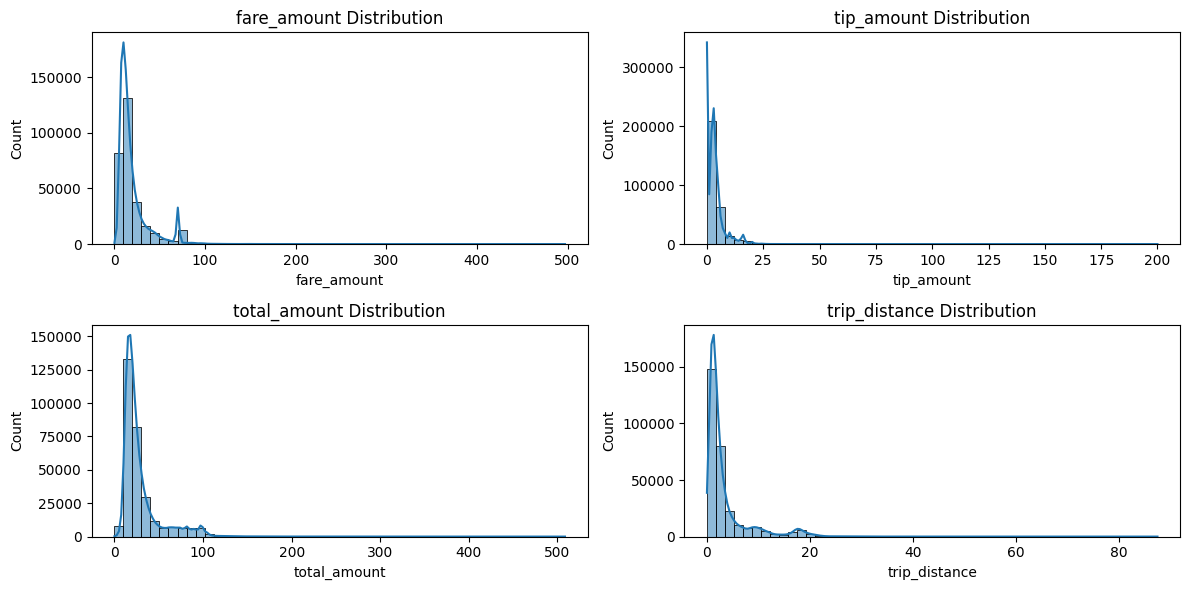

In [98]:
plt.figure(figsize=(12,6))

for i, col in enumerate(financial_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df1[col], bins=50, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [99]:
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Remove rows where any of the financial fields is zero or negative
df_clean = df1[
    (df1['fare_amount'] > 0) &
    (df1['total_amount'] > 0) &
    (df1['trip_distance'] > 0) &
    (df1['tip_amount'] >= 0)
].copy()

print("Original DataFrame shape:", df1.shape)
print("Cleaned DataFrame shape:", df_clean.shape)

Original DataFrame shape: (299944, 24)
Cleaned DataFrame shape: (293989, 24)


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [100]:
# Create a df with non zero entries for the selected parameters.
df_fare_amount = df1[~(df1['fare_amount'] ==0)]
df_total_amount = df_fare_amount[~(df_fare_amount['total_amount'] ==0)]
df_non_zero = df_total_amount[~((df_total_amount['trip_distance'] == 0) & (df_total_amount['PULocationID'] != df_total_amount['DOLocationID']))]

# Dropping entries were trip_distance = 0 but PULocationID and DOLocationID are not same.
# tip_amount should remain, since tipping is optional and for tip_amount == 0, there is total amount present. There are way too many entries for the same.

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [103]:
# Group data by month and analyse monthly revenue

monthly_revenue = df_non_zero.groupby("month")['total_amount'].sum()

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_revenue, marker="o", linestyle='-', color='grey')

plt.title("Monthly Revenue")
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.savefig('Monthly_Revenue.png')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [107]:
# Calculate proportion of each quarter

df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_trend = df_non_zero.groupby('quarter')['total_amount'].sum()

plt.figure(figsize=(6,4))
plt.pie(quarterly_trend, 
        labels=quarterly_trend.index.astype(str), 
        autopct='%.2f%%', 
        colors=['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3'], 
        explode=(0, 0.1, 0, 0))

plt.title('Proportion of Revenue per Quarter')
plt.tight_layout()
plt.savefig('Revenue_per_Quarter.png')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

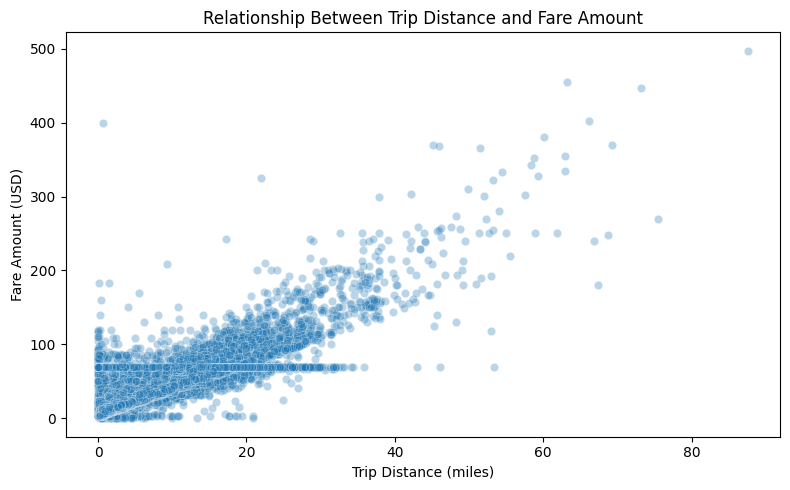


The correlation value between 'trip_distance' and 'fare_amount' is 0.95.


In [110]:
# Show how trip fare is affected by distance

dist_fare_plot = df_non_zero[['trip_distance', 'fare_amount']]
dist_fare_plot = dist_fare_plot[dist_fare_plot['trip_distance'] != 0]

plt.figure(figsize=(8,5))
sns.scatterplot(data=dist_fare_plot, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.tight_layout()
plt.savefig('Relationship-trip_distance_and_fare.png')
plt.show()

correlation_value = dist_fare_plot['trip_distance'].corr(dist_fare_plot['fare_amount']).round(2)
print(f"\nThe correlation value between 'trip_distance' and 'fare_amount' is {correlation_value}.")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

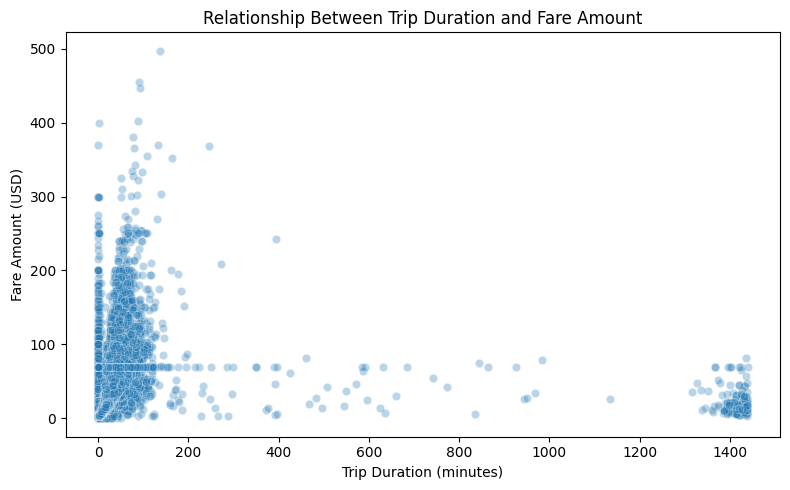


The correlation value between 'trip_duration' and 'fare_amount' is 0.28.


In [112]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df_non_zero['trip_duration'] = (df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove extreme outliers for trip duration
df_non_zero = df_non_zero[df_non_zero['trip_duration'] <= 5000]

# Prepare data for plotting
duration_fare_plot = df_non_zero[['trip_duration', 'fare_amount']]

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=duration_fare_plot, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Relationship Between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.tight_layout()
plt.savefig('Relationship_TripDuration_Fare.png')
plt.show()

# Calculate and print correlation
corr2 = duration_fare_plot['trip_duration'].corr(duration_fare_plot['fare_amount'])
print(f"\nThe correlation value between 'trip_duration' and 'fare_amount' is {corr2:.2f}.")

In [114]:
# Show relationship between fare and number of passengers

nop_fare_plot = df_non_zero[['passenger_count', 'fare_amount']]

sns.scatterplot(data=nop_fare_plot, x='passenger_count', y='fare_amount')
plt.title('Fare vs Number of Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount (USD)')
plt.show()

corr3 = nop_fare_plot['passenger_count'].corr(nop_fare_plot['fare_amount'])
print(f"\nThe correlation value is {corr3:.2f}.")


The correlation value is 0.04.


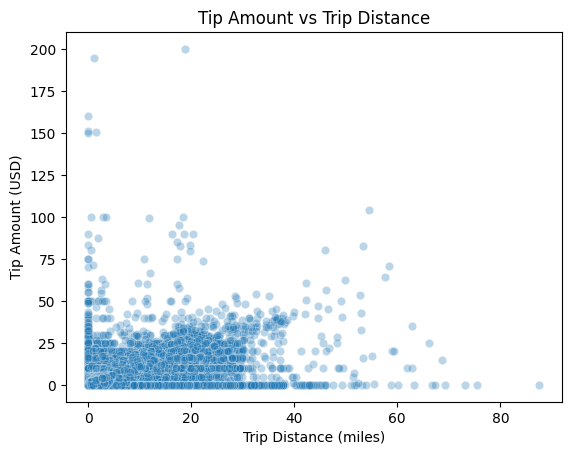


The correlation value is 0.57.


In [115]:
# Show relationship between tip and trip distance

df_tip_trip = df_non_zero[['tip_amount', 'trip_distance']]

sns.scatterplot(data=df_tip_trip, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.show()

corr4 = df_tip_trip['trip_distance'].corr(df_tip_trip['tip_amount'])
print(f"\nThe correlation value is {corr4:.2f}.")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

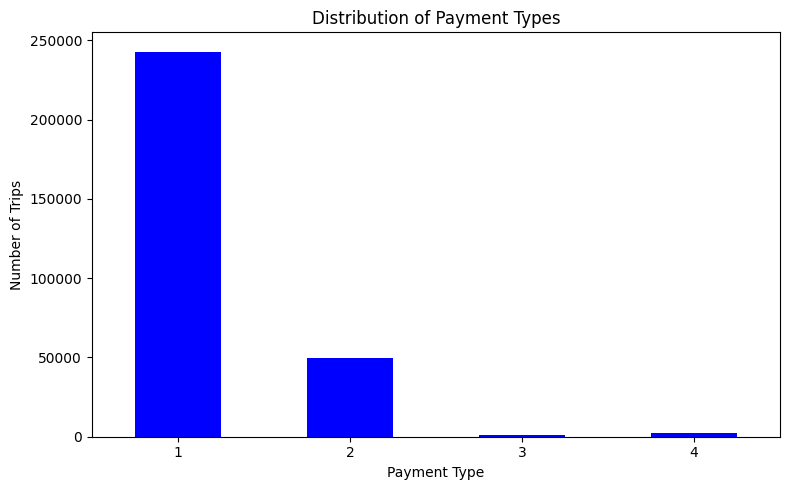

In [120]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df_non_zero['payment_type'].value_counts().sort_index()

plt.figure(figsize=(8,5))
payment_counts.plot(kind='bar', color='b')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [122]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [125]:
import geopandas as gpd

os.chdir(r'D:\Data Science\Dataset\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Read the shapefile using geopandas
zones = gpd.read_file(r'D:\Data Science\Dataset\Datasets and Dictionary-NYC\Datasets and Dictionary/taxi_zones')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


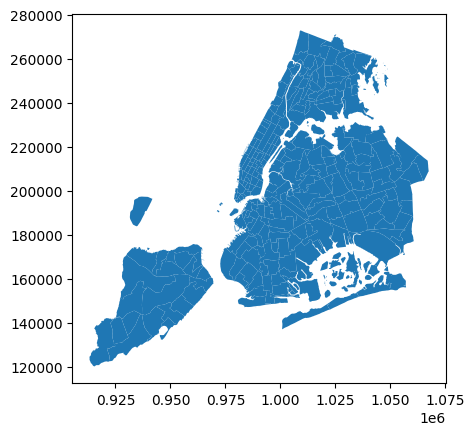

In [134]:
print(zones.info())
zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [135]:
# Merge zones and trip records using locationID and PULocationID

final_df = pd.merge(left=df_non_zero, right=zones, how='left', left_on='PULocationID', right_on='LocationID')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [140]:
# Group data by location and calculate the number of trips

number_of_trips = final_df.groupby('PULocationID').size().reset_index(name='total_trips')
number_of_trips = number_of_trips.sort_values('total_trips', ascending=False)
number_of_trips.head(10)

PULocationID  total_trips
115           132        15324
212           237        13768
143           161        13609
211           236        12602
144           162        10487
165           186        10081
121           138        10036
205           230        10015
125           142         9861
152           170         8796

In [141]:
number_of_trips.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [142]:
# Merge trip counts back to the zones GeoDataFrame

zones_modified = pd.merge(left=zones, right=number_of_trips, how='left', on='LocationID')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

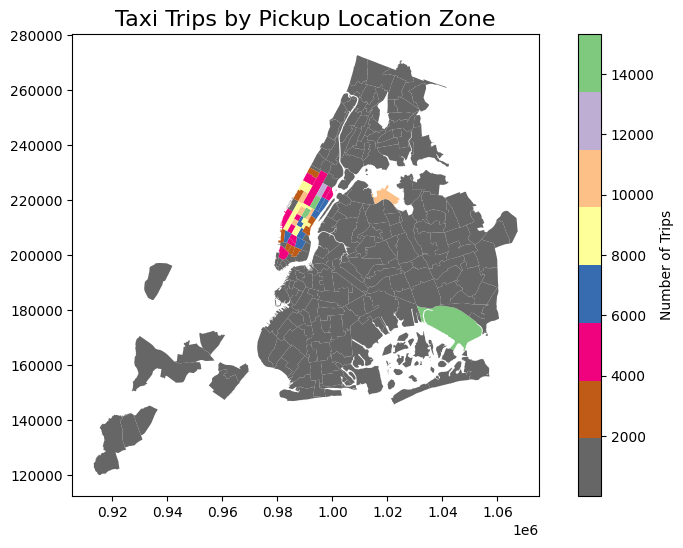

In [149]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the map and display it
zones_modified.plot(column='total_trips',
                    ax=ax,
                    legend=True,
                    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
                    cmap='Accent_r')

# Add title
ax.set_title("Taxi Trips by Pickup Location Zone", fontsize=16)

# axis for cleaner map
ax.set_axis_on()

plt.show()

In [150]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones_modified.sort_values(by='total_trips', ascending=False)
zones_sorted.head(10)  # Displays top 10 zones with most trips

OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
137       138    0.107467    0.000537             LaGuardia Airport   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     total_trips  
131      15324.0  
236      13768.0  
160      13609.0  
235      12602.0  
161      10487.0  
185      10081.0  
137      10036.0  
229      10015.0  
141       9861.0  
169       8796.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [152]:
# Find routes which have the slowest speeds at different times of the day

# Calculate average trip duration per route per hour
avg_duration = final_df.groupby(['PULocationID', 'DOLocationID', 'hour'])['trip_duration'].mean().reset_index()
avg_duration.rename(columns={'trip_duration': 'avg_trip_duration'}, inplace=True)

# Merge average duration back to the main DataFrame to access trip distance for each record
merged_data = pd.merge(final_df, avg_duration, on=['PULocationID', 'DOLocationID', 'hour'], how='left')

# Calculate speed (mph): trip_distance (miles) divided by average trip duration (hours)
merged_data['speed_mph'] = merged_data['trip_distance'] / (merged_data['avg_trip_duration'] / 60)

# Calculate average speed for each route at each hour
slow_routes = merged_data.groupby(['PULocationID', 'DOLocationID', 'hour'])['speed_mph'].mean().reset_index()
slow_routes = slow_routes[slow_routes['PULocationID'] != slow_routes['DOLocationID']]
slow_routes_sorted = slow_routes.sort_values(by=['hour', 'speed_mph']) # find slowest route
slow_routes_sorted.head(10)

PULocationID  DOLocationID  hour  speed_mph
61102           249           100     0   0.077771
53907           234           125     0   0.150576
36249           158           234     0   0.286893
41470           164           162     0   0.371147
19460           114           234     0   0.416072
41129           164           112     0   0.526663
43877           170           239     0   0.670212
19236           114           170     0   0.878553
52694           233           100     0   1.049327
10692            79            68     0   1.410189

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

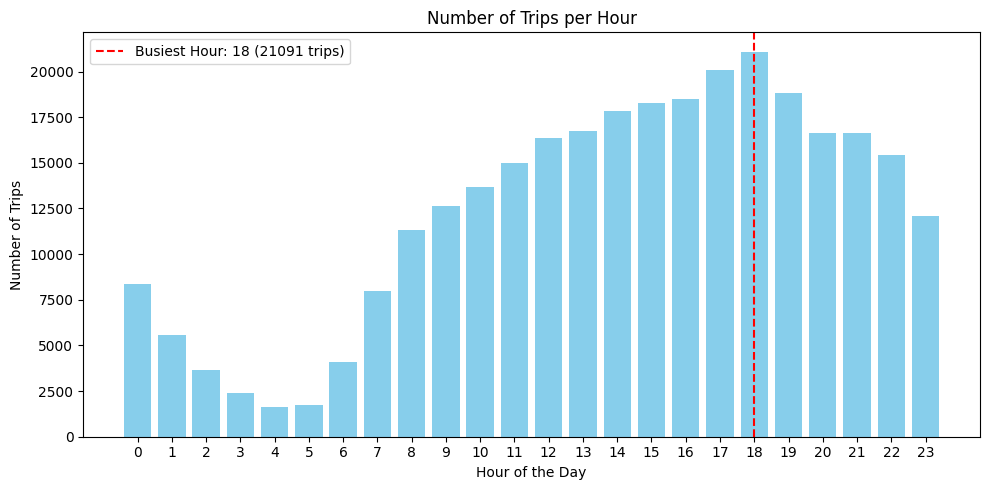

In [154]:
# Visualise the number of trips per hour and find the busiest hour

trips_by_hour = merged_data['hour'].value_counts().sort_index()
busiest_hour = trips_by_hour.idxmax()
busiest_hour_count = trips_by_hour.max()

plt.figure(figsize=(10, 5))
plt.bar(trips_by_hour.index, trips_by_hour.values, color='skyblue')
plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_count} trips)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.xticks(range(24))
plt.legend()
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [155]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1 # as per the second sampling condition

# Scale up trip counts
trips_by_hour_scaled = trips_by_hour / sample_fraction

# Scale up busiest hour's trip count
busiest_hour_scaled = busiest_hour_count / sample_fraction
busiest_hour, busiest_hour_scaled

(18, 210910.0)

In [156]:
merged_data["hour"].value_counts().sort_index().sort_values(ascending=False).head(5) #Actual number of trips in the five busiest hours

hour
18    21091
17    20057
19    18833
16    18492
15    18271
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

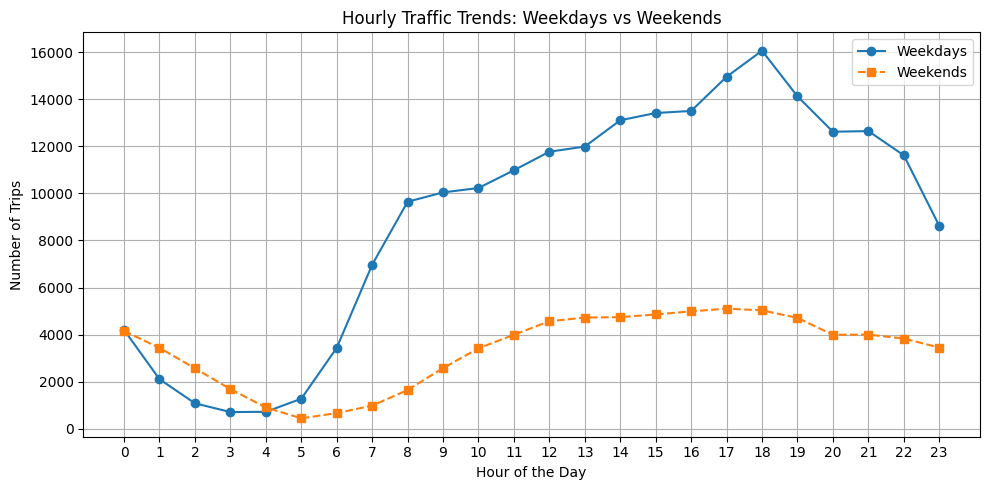

In [157]:
# Compare traffic trends for the week days and weekends

merged_data["week_part"] = merged_data["days"].apply(lambda x: "Weekday" if x <= 5 else "Weekend")

traffic_trends = merged_data.groupby(["hour", "week_part"]).size().unstack()

plt.figure(figsize=(10, 5))
plt.plot(traffic_trends.index, traffic_trends["Weekday"], label="Weekdays", marker="o", linestyle="-")
plt.plot(traffic_trends.index, traffic_trends["Weekend"], label="Weekends", marker="s", linestyle="--")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Trends: Weekdays vs Weekends")
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [163]:
pickup_trend.columns

Index(['JFK Airport', 'LaGuardia Airport', 'Lincoln Square East',
       'Midtown Center', 'Midtown East', 'Murray Hill',
       'Penn Station/Madison Sq West', 'Times Sq/Theatre District',
       'Upper East Side North', 'Upper East Side South'],
      dtype='object', name='zone')

In [164]:
# Find top 10 pickup and dropoff zones

# Identify top 10 pickup and dropoff zones by counts
top_pickup_zones = merged_data.groupby("zone")["PULocationID"].count().nlargest(10).index.tolist()
top_dropoff_zones = merged_data.groupby("zone")["DOLocationID"].count().nlargest(10).index.tolist()

# Filter data for these zones
df_top_pickup_zones = merged_data[merged_data["zone"].isin(top_pickup_zones)]
df_top_dropoff_zones = merged_data[merged_data["zone"].isin(top_dropoff_zones)]

# Compute hourly trends
pickup_trend = df_top_pickup_zones.groupby(["hour", "zone"])["PULocationID"].count().unstack()
dropoff_trend = df_top_dropoff_zones.groupby(["hour", "zone"])["DOLocationID"].count().unstack()

<Figure size 1000x500 with 0 Axes>

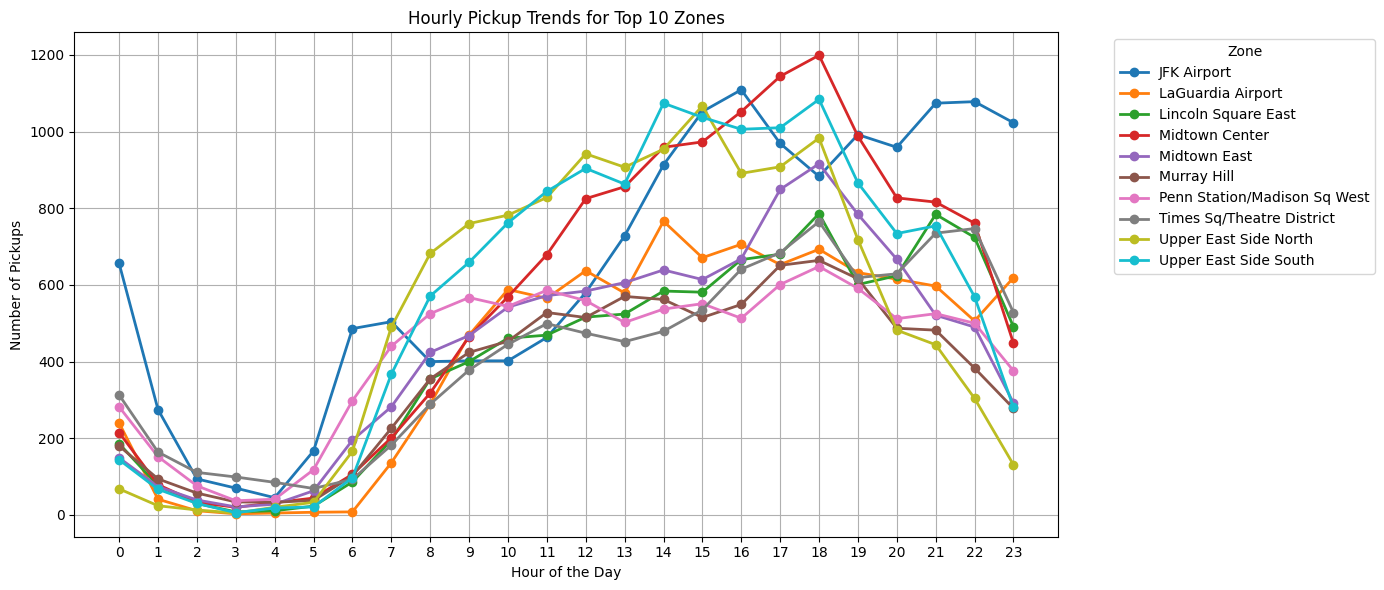

In [165]:
# Hourly pickup trends
plt.figure(figsize=(10, 5))
pickup_trend.plot(marker='o', linewidth=2, figsize=(14, 6))
plt.title("Hourly Pickup Trends for Top 10 Zones")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.grid(True)
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

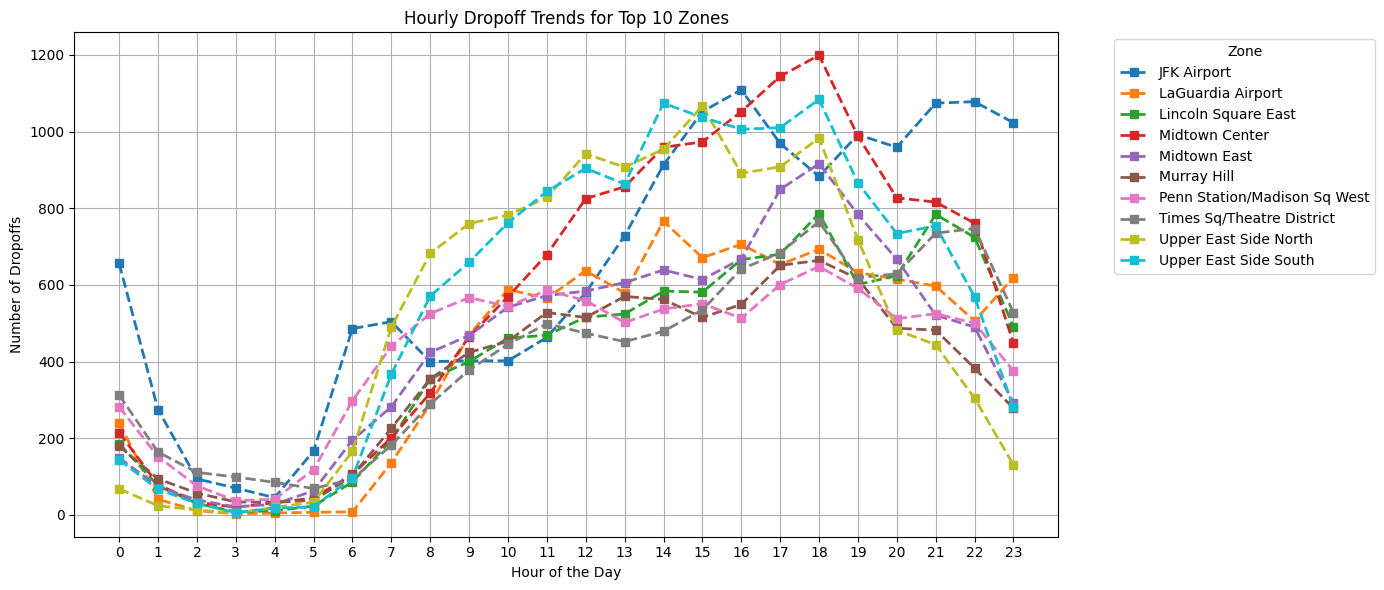

In [166]:
# Hourly dropoff trends
plt.figure(figsize=(10, 5))
dropoff_trend.plot(marker='s', linestyle='--', linewidth=2, figsize=(14, 6))
plt.title("Hourly Dropoff Trends for Top 10 Zones")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Dropoffs")
plt.xticks(range(24))
plt.grid(True)
plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [167]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = merged_data.groupby("zone")["PULocationID"].count()
dropoff_counts = merged_data.groupby("zone")["DOLocationID"].count()

# Calculate pickup/dropoff ratio (only for zones where both exist)
ratio = (pickup_counts / dropoff_counts).dropna()

top_10 = ratio.sort_values(ascending=False).head(10)
bottom_10 = ratio.sort_values().head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10)

Top 10 Pickup/Dropoff Ratios:
zone
Allerton/Pelham Gardens    1.0
Pelham Parkway             1.0
Murray Hill-Queens         1.0
Newark Airport             1.0
North Corona               1.0
Norwood                    1.0
Oakland Gardens            1.0
Ocean Hill                 1.0
Ocean Parkway South        1.0
Old Astoria                1.0
dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
zone
Allerton/Pelham Gardens    1.0
Murray Hill                1.0
Murray Hill-Queens         1.0
Newark Airport             1.0
North Corona               1.0
Norwood                    1.0
Oakland Gardens            1.0
Ocean Hill                 1.0
Ocean Parkway South        1.0
Old Astoria                1.0
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [169]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]
df_night = merged_data[merged_data["hour"].isin(night_hours)]

# Top 10 pickup zones
top_pickups = df_night['zone'].value_counts().head(10)
print("Top 10 Pickup Zones (11PM–5AM):")
print(top_pickups)

# Top 10 dropoff zones
top_dropoffs = df_night.groupby('zone')['DOLocationID'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Dropoff Zones (11PM–5AM):")
print(top_dropoffs)

Top 10 Pickup Zones (11PM–5AM):
zone
East Village                    2562
JFK Airport                     2330
West Village                    1999
Clinton East                    1638
Lower East Side                 1587
Greenwich Village South         1393
Times Sq/Theatre District       1369
Penn Station/Madison Sq West    1082
East Chelsea                     985
Midtown South                    973
Name: count, dtype: int64

Top 10 Dropoff Zones (11PM–5AM):
zone
East Village                    2562
JFK Airport                     2330
West Village                    1999
Clinton East                    1638
Lower East Side                 1587
Greenwich Village South         1393
Times Sq/Theatre District       1369
Penn Station/Madison Sq West    1082
East Chelsea                     985
Midtown South                    973
Name: DOLocationID, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [171]:
# Filter for night hours (11 PM to 5 AM)

night_hours = [23, 0, 1, 2, 3, 4, 5]

# Split data into night and day
df_night = merged_data[merged_data["hour"].isin(night_hours)]
df_day = merged_data[~merged_data["hour"].isin(night_hours)]

# Calculate revenue sums
night_revenue = df_night['total_amount'].sum().round(2)
day_revenue = df_day['total_amount'].sum().round(2)
total_revenue = night_revenue + day_revenue

print(f"Nighttime revenue: ${night_revenue}")
print(f"Daytime revenue: ${day_revenue}")

print(f"\nNighttime revenue share: {night_revenue / total_revenue * 100:.2f}%")
print(f"Daytime revenue share: {day_revenue / total_revenue * 100:.2f}%")

Nighttime revenue: $1055813.6
Daytime revenue: $7509202.24

Nighttime revenue share: 12.33%
Daytime revenue share: 87.67%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [172]:
# Analyse the fare per mile per passenger for different passenger counts

fare_per_mile = merged_data.groupby("passenger_count")[['fare_amount', 'trip_distance']].sum()

# Convert passenger_count index to numeric values (just in case) and replace 0 with NaN to avoid division errors
passenger_counts = fare_per_mile.index.to_series().replace(0, np.nan)

# Calculate average fare per mile per passenger
fare_per_mile["avg_fare_per_mile_per_passenger"] = ((fare_per_mile["fare_amount"] / fare_per_mile["trip_distance"]) / passenger_counts).round(2)

print(fare_per_mile[["avg_fare_per_mile_per_passenger"]])

                 avg_fare_per_mile_per_passenger
passenger_count                                 
1.0                                         5.74
2.0                                         2.72
3.0                                         1.87
4.0                                         1.45
5.0                                         1.14
6.0                                         0.94


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [173]:
# Compare the average fare per mile for different days and for different times of the day

# Average fare per mile by day
fare_per_mile_days = merged_data.groupby("days")[['fare_amount', 'trip_distance']].sum()
avg_fare_per_mile_days = (fare_per_mile_days['fare_amount'] / fare_per_mile_days['trip_distance']).round(2)
avg_fare_per_mile_days = avg_fare_per_mile_days.sort_values(ascending=False)

print("Average Fare per Mile by Day of the Week:")
print(avg_fare_per_mile_days)

# Average fare per mile by hour
fare_per_mile_hours = merged_data.groupby("hour")[['fare_amount', 'trip_distance']].sum()
avg_fare_per_mile_hours = (fare_per_mile_hours['fare_amount'] / fare_per_mile_hours['trip_distance']).round(2)
avg_fare_per_mile_hours = avg_fare_per_mile_hours.sort_values(ascending=False)

print("\nAverage Fare per Mile by Hour of the Day:")
print(avg_fare_per_mile_hours)

Average Fare per Mile by Day of the Week:
days
3    5.91
4    5.88
2    5.82
5    5.77
6    5.76
1    5.37
7    5.27
dtype: float64

Average Fare per Mile by Hour of the Day:
hour
17    6.12
18    6.07
11    6.07
12    6.04
15    5.97
10    5.95
13    5.94
16    5.92
14    5.89
9     5.87
8     5.75
19    5.72
20    5.45
2     5.38
21    5.36
22    5.31
1     5.28
7     5.23
0     5.15
23    5.11
3     5.08
6     4.69
4     4.67
5     4.50
dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [178]:
# Compare fare per mile for different vendors

df_clean = merged_data[merged_data["trip_distance"] > 0].copy()

fare_per_mile_by_vendor_hour = df_clean.groupby(["VendorID", "hour"])[["fare_amount", "trip_distance"]].sum()

# Calculate average fare per mile per vendor per hour
fare_per_mile_by_vendor_hour["avg_fare_per_mile"] = fare_per_mile_by_vendor_hour["fare_amount"] / fare_per_mile_by_vendor_hour["trip_distance"]

fare_per_mile_by_vendor_hour_pivot = fare_per_mile_by_vendor_hour["avg_fare_per_mile"].unstack(level=0)

# Compute overall average fare per mile per vendor
fare_per_mile_by_vendor = df_clean.groupby("VendorID").apply(lambda x: (x["fare_amount"] / x["trip_distance"]).mean().round(2))

print("Overall Average Fare per Mile per Vendor:")
print(fare_per_mile_by_vendor)
print("\nHourly Fare per Mile per Vendor (Pivot Table):")
print(fare_per_mile_by_vendor_hour_pivot.round(2))

Overall Average Fare per Mile per Vendor:
VendorID
1     8.13
2    12.66
6     5.87
dtype: float64

Hourly Fare per Mile per Vendor (Pivot Table):
VendorID     1     2     6
hour                      
0         5.19  5.01  5.76
1         5.04  5.21   NaN
2         5.15  5.28   NaN
3         4.96  4.98   NaN
4         4.73  4.50   NaN
5         4.39  4.44  3.62
6         4.64  4.62  3.01
7         5.21  5.15  5.39
8         5.68  5.70  4.84
9         5.83  5.80  3.59
10        5.86  5.87  5.06
11        5.99  6.02   NaN
12        5.93  6.01  9.09
13        5.86  5.89  5.12
14        5.91  5.82  5.27
15        5.94  5.87  4.03
16        5.93  5.82  5.49
17        6.07  6.03  4.65
18        5.98  5.99  4.84
19        5.69  5.66  3.11
20        5.45  5.37  3.79
21        5.33  5.29   NaN
22        5.21  5.24   NaN
23        5.00  5.05   NaN


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [179]:
# Defining distance tiers

# Ensure no zero distances (to avoid division by zero later)
df_clean = merged_data[merged_data["trip_distance"] > 0].copy()

# Define distance tiers using pd.cut
df_clean["distance_tier"] = pd.cut(
    df_clean["trip_distance"],
    bins=[0, 2, 5, float('inf')],
    labels=["0-2 miles", "2-5 miles", "5+ miles"]
)

# Check the tier distribution
print(df_clean["distance_tier"].value_counts())

distance_tier
0-2 miles    161688
2-5 miles     80999
5+ miles      51319
Name: count, dtype: int64


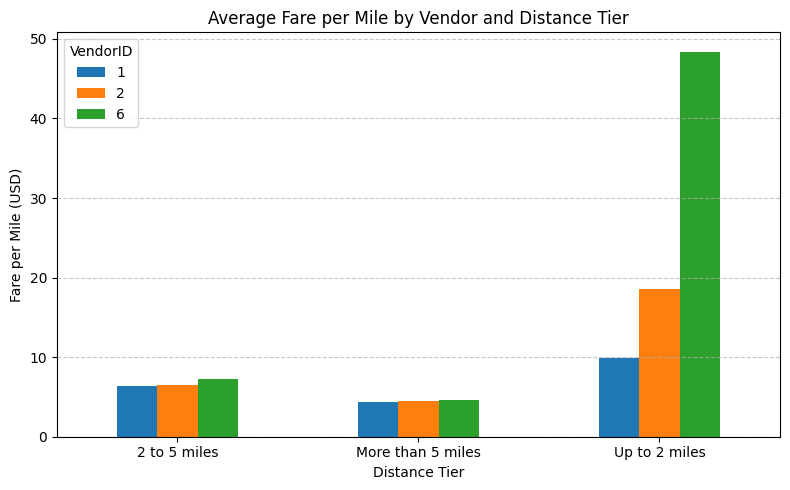

In [182]:
# Defining distance tiers

# Calculate fare per mile
merged_data['fare_per_mile'] = merged_data['fare_amount'] / merged_data['trip_distance']

# Define distance tiers
tier1 = merged_data[merged_data['trip_distance'] <= 2].copy()
tier2 = merged_data[(merged_data['trip_distance'] > 2) & (merged_data['trip_distance'] <= 5)].copy()
tier3 = merged_data[merged_data['trip_distance'] > 5].copy()

# Add tier labels
tier1['Tier'] = 'Up to 2 miles'
tier2['Tier'] = '2 to 5 miles'
tier3['Tier'] = 'More than 5 miles'

# Combine all tiers
combined_df = pd.concat([tier1, tier2, tier3])

# Group by Tier and VendorID and compute mean fare per mile
results = combined_df.groupby(['Tier', 'VendorID'])['fare_per_mile'].mean().unstack()

results.plot(kind='bar', figsize=(8, 5))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [189]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Create a new DataFrame with only required columns
tips_df = merged_data[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'hour']].copy()

# Calculate tip percentage
tips_df['tip_percentage'] = (tips_df['tip_amount'] / tips_df['total_amount']) * 100

# Create simple categories
tips_df['distance_category'] = pd.cut(tips_df['trip_distance'], [0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'])
tips_df['passenger_category'] = pd.cut(tips_df['passenger_count'], [0, 1, 3, float('inf')], labels=['1 passenger', '2-3 passengers', '4+ passengers'])
tips_df['time_category'] = pd.cut(tips_df['hour'], [0, 6, 12, 18, 24], labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'], right=False)

# Calculate average tip percentages
print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('time_category')['tip_percentage'].mean())

# Find factors leading to low tips (<10%)
low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]
print("\nFactors Leading to Low Tip Percentages:")
print(low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category']).size().sort_values(ascending=False).head(10))

Average Tip Percentage by Distance:
distance_category
Up to 2 miles        12.097005
2 to 5 miles         12.192649
More than 5 miles    11.250620
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_category
1 passenger       12.079162
2-3 passengers    11.687131
4+ passengers     11.326064
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_category
Midnight to 6 AM    11.516416
6 AM to Noon        11.858134
Noon to 6 PM        11.806976
6 PM to Midnight    12.336684
Name: tip_percentage, dtype: float64

Factors Leading to Low Tip Percentages:
distance_category  passenger_category  time_category   
Up to 2 miles      1 passenger         Noon to 6 PM        16220
                                       6 PM to Midnight    12047
                                       6 AM to Noon        10142
2 to 5 miles       1 passenger         6 PM to Midnight     6868
                                       Noon to 6 PM         6

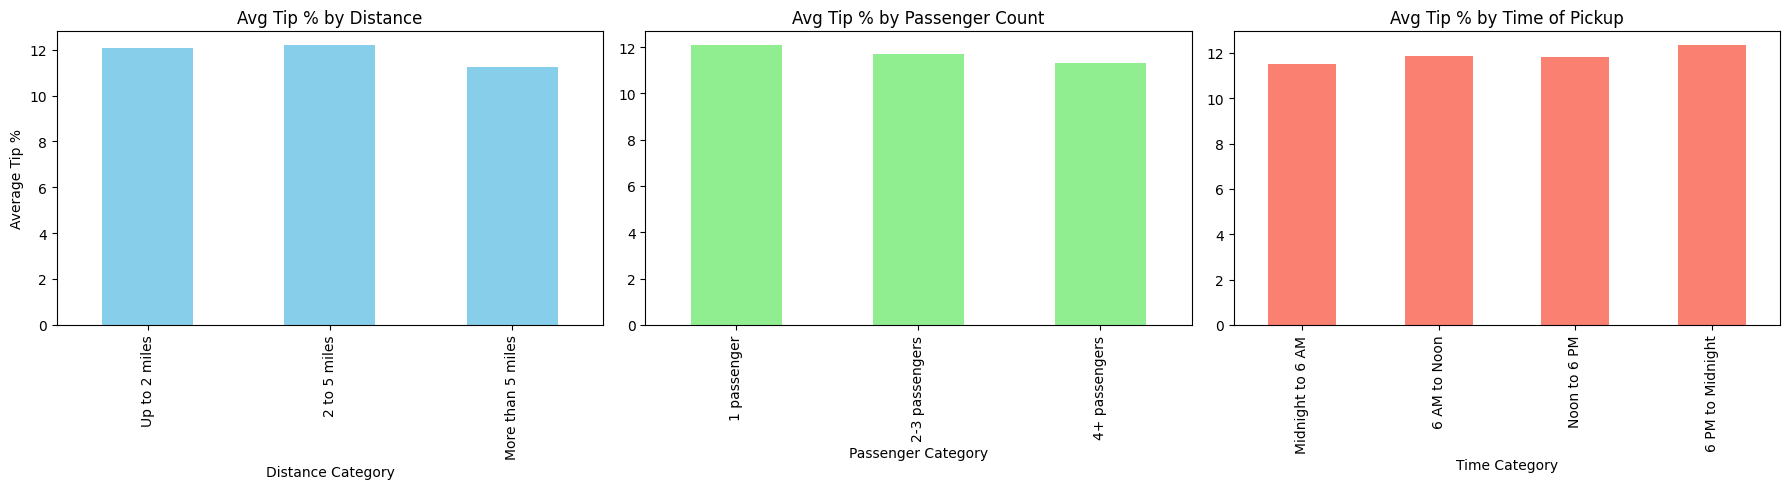

In [190]:
avg_tip_by_distance = tips_df.groupby('distance_category')['tip_percentage'].mean()
avg_tip_by_passenger = tips_df.groupby('passenger_category')['tip_percentage'].mean()
avg_tip_by_time = tips_df.groupby('time_category')['tip_percentage'].mean()

# Create a figure with three subplots (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot average tip percentage by distance category
avg_tip_by_distance.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Avg Tip % by Distance')
axes[0].set_xlabel('Distance Category')
axes[0].set_ylabel('Average Tip %')

# Plot average tip percentage by passenger count
avg_tip_by_passenger.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Avg Tip % by Passenger Count')
axes[1].set_xlabel('Passenger Category')

# Plot average tip percentage by time of pickup
avg_tip_by_time.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Avg Tip % by Time of Pickup')
axes[2].set_xlabel('Time Category')

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [191]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# It's optional


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

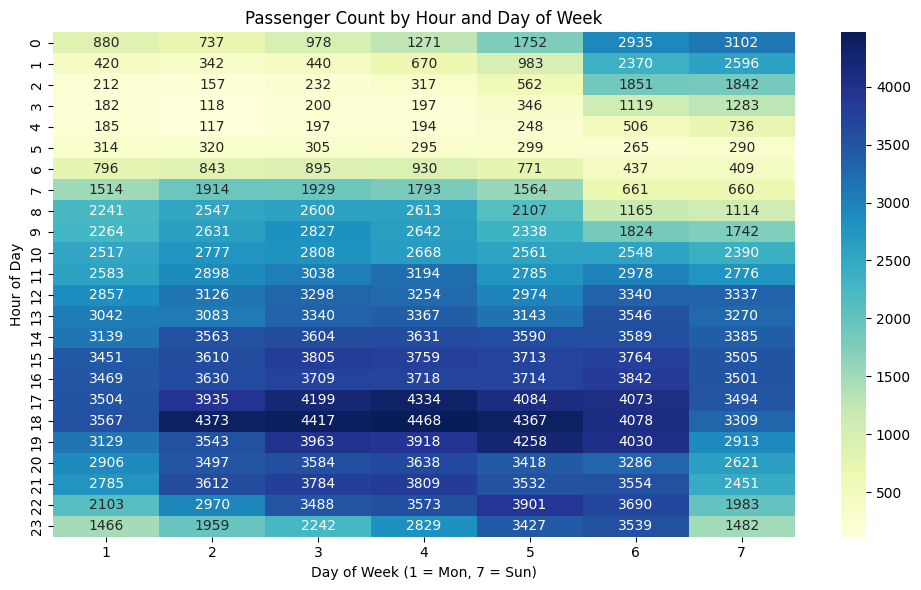

In [192]:
# See how passenger count varies across hours and days

# Group total passengers by day of week and hour
passenger_counts = merged_data.groupby(['days', 'hour'])['passenger_count'].sum().reset_index()

# Convert to pivot table for heatmap
pivot_table = passenger_counts.pivot(index='hour', columns='days', values='passenger_count')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Passenger Count by Hour and Day of Week')
plt.xlabel('Day of Week (1 = Mon, 7 = Sun)')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [193]:
# How does passenger count vary across zones

# Calculate total passenger count per zone
zone_passenger_count = merged_data.groupby('zone')['passenger_count'].sum().sort_values(ascending=False)

# Show top 20 zones
zone_passenger_count.head(20)

zone
JFK Airport                     22712.0
Midtown Center                  18769.0
Upper East Side South           18520.0
Upper East Side North           16656.0
Times Sq/Theatre District       14723.0
Midtown East                    13890.0
LaGuardia Airport               13670.0
Penn Station/Madison Sq West    13509.0
Lincoln Square East             13376.0
Midtown North                   11814.0
Murray Hill                     11628.0
Upper West Side South           11583.0
Clinton East                    11009.0
East Chelsea                    10859.0
Union Sq                        10653.0
Midtown South                    9691.0
East Village                     9506.0
Lenox Hill West                  9412.0
West Village                     8845.0
Gramercy                         8132.0
Name: passenger_count, dtype: float64

In [194]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# 1. Compute average passenger count per zone
merged_data['avg_passenger_count'] = merged_data.groupby('zone')['passenger_count'].transform('mean')

# 2. Create a DataFrame with unique zone names and their average passenger count
zone_avg = merged_data[['zone', 'avg_passenger_count']].drop_duplicates()

# 3. Clean and sort the data
zone_avg = zone_avg.dropna().sort_values(by='avg_passenger_count', ascending=False).reset_index(drop=True).round(2)

# 4. Display top 10 zones
zone_avg.head(10)

zone  avg_passenger_count
0          Manhattan Beach                 2.50
1      Ocean Parkway South                 2.25
2                 Red Hook                 2.12
3          Queensboro Hill                 2.00
4             Crotona Park                 2.00
5         Inwood Hill Park                 2.00
6               Ozone Park                 2.00
7  Arrochar/Fort Wadsworth                 1.80
8       Brooklyn Navy Yard                 1.75
9                 Elmhurst                 1.70

Find out how often surcharges/extra charges are applied to understand their prevalance

In [195]:
# Define the columns related to surcharges
surcharge_cols = ['extra', 'mta_tax', 'congestion_surcharge', 'improvement_surcharge', 'fee_airport']

# Loop through each column and check how often non-zero values appear
for col in surcharge_cols:
    total = merged_data.shape[0]
    non_zero = (merged_data[col] > 0).sum()
    print(f"{col}: Applied in {non_zero} out of {total} trips ({(non_zero/total)*100:.2f}%)")

extra: Applied in 179034 out of 294006 trips (60.89%)
mta_tax: Applied in 292163 out of 294006 trips (99.37%)
congestion_surcharge: Applied in 273776 out of 294006 trips (93.12%)
improvement_surcharge: Applied in 294002 out of 294006 trips (100.00%)
fee_airport: Applied in 24942 out of 294006 trips (8.48%)


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [198]:
# How often is each surcharge applied?

# Total number of trips
total_trips = len(merged_data)

# List of surcharge columns
surcharge_cols = ['extra', 'congestion_surcharge', 'improvement_surcharge']

# 1. Frequency summary
print("Surcharge Frequency Summary \n")
for col in surcharge_cols:
    count = (merged_data[col] > 0).sum()
    print(f"{col} applied in {count:,} trips ({count / total_trips:.2%})")

# 2. Hourly pattern of 'extra' charge (usually night fare or rush hour)
print("\n Hourly Pattern of 'extra' Surcharge")
hourly_extra = merged_data[merged_data['extra'] > 0].groupby('hour').size()
print(hourly_extra.sort_index())

# 3. Top pickup zones with frequent 'extra' charge
print("\n Top 10 Pickup Zones by 'extra' Surcharge Applied")
pickup_extra = merged_data[merged_data['extra'] > 0].groupby('zone').size().sort_values(ascending=False).head(10)
print(pickup_extra)

# 4. Top dropoff zones with frequent 'extra' charge
print("\n Top 10 Dropoff Zones by 'extra' Surcharge Applied")
dropoff_extra = merged_data[merged_data['extra'] > 0].groupby('zone').size().sort_values(ascending=False).head(10)
print(dropoff_extra)

Surcharge Frequency Summary 

extra applied in 179,034 trips (60.89%)
congestion_surcharge applied in 273,776 trips (93.12%)
improvement_surcharge applied in 294,002 trips (100.00%)

 Hourly Pattern of 'extra' Surcharge
hour
0      7685
1      5177
2      3435
3      2218
4      1321
5      1354
6      1243
7      2324
8      3272
9      3755
10     4118
11     4542
12     4954
13     4978
14     5431
15     5473
16    13813
17    15573
18    16581
19    14759
20    15531
21    15730
22    14525
23    11242
dtype: int64

 Top 10 Pickup Zones by 'extra' Surcharge Applied
zone
LaGuardia Airport               9872
Midtown Center                  8653
Upper East Side South           7877
JFK Airport                     7496
Times Sq/Theatre District       6631
Upper East Side North           6572
Midtown East                    6437
Lincoln Square East             6187
Penn Station/Madison Sq West    5937
Midtown North                   5324
dtype: int64

 Top 10 Dropoff Zones by 'extra' S

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## **Routing & Dispatch Optimization – Key Recommendations**
- **Peak Hour Dispatching:**
    Allocate more cabs during peak hours (7–10 AM, 4–9 PM) in busy zones like Midtown and airports.

- **Zone-Based Prioritization:**
Focus fleet availability in high-demand pickup/drop zones (e.g., JFK, LaGuardia, Financial District).

- **Nighttime Strategy:**
Provide bonuses to drivers for working night shifts (11 PM – 5 AM) where demand remains strong.

- **Smart Vehicle Assignment:**
Use sedans for weekdays and larger vehicles during weekends or tourist-heavy hours.

- **Reduce Inefficiencies:**
Fix trips with 0 fare/distance, eliminate invalid records, and use live data for dynamic routing.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

## **Zone-Specific Insights:**
Our spatial analysis indicates that certain pickup and dropoff zones consistently register higher trip counts and, in many cases, a higher frequency of extra charges and surcharges. These areas likely represent business districts or regions with unique traffic conditions:

- **Strategic Positioning:** Cabs should be proactively positioned in these high-demand zones. By analyzing the trends across hours, days, and even months, companies can develop a dynamic repositioning strategy. For example, during weekday evenings, a higher concentration of vehicles near popular office areas or transit hubs can ensure that supply meets the surge in demand. Conversely, on weekends, more vehicles might be allocated near entertainment or leisure districts.
- **Operational Efficiency:** Adjustments to the dispatching protocol that consider both spatial and temporal demand can reduce idle time, minimize fuel costs, and improve overall operational efficiency.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

## **Pricing Strategy Adjustments:**
The presence of extra charges and surcharges—especially those that spike during periods of high demand—offers clues about market pressure points and operational challenges. To maximize revenue while remaining competitive, a flexible, data-driven pricing strategy is essential:

- **Dynamic Pricing:** Implement surge pricing during identified peak hours and zones. This adjustment would not only help balance supply and demand but also capture additional revenue during periods of operational stress.
- **Competitive Rate Management:** While surge pricing can drive revenue, it is critical to monitor competitor rates closely. A dynamic pricing model that takes into account both the demand data and competitor pricing will help maintain market competitiveness. This model can also factor in special events or weather conditions that might influence customer behavior.
- **Customer Perception:** Transparent communication about pricing changes and ensuring that base rates remain reasonable will be key to retaining customer trust while optimizing revenue.